<a href="https://colab.research.google.com/github/mqquiroz/SWAN/blob/main/SWAN_Ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://swanmodel.sourceforge.io/download/zip/swan4151.tar.gz
!tar -xzf swan4151.tar.gz
%cd swan4151
!perl switch.pl -unix
!make config
!make ser
%cd ..
!mkdir modelo_SWAN
%cd swan4151
%cp -r 'swan.exe' 'swanrun' '/content/modelo_SWAN'
%cd ..
!rm -r swan4151
!rm swan4151.tar.gz
%cd modelo_SWAN
!chmod +x swanrun swan.exe
#!chmod +rx ./swanrun ./swan.exe
import os
cwd = os.getcwd()
os.environ['PATH'] += ":"+cwd
%cd ..

--2025-11-20 15:25:54--  https://swanmodel.sourceforge.io/download/zip/swan4151.tar.gz
Resolving swanmodel.sourceforge.io (swanmodel.sourceforge.io)... 104.18.10.31, 104.18.11.31
Connecting to swanmodel.sourceforge.io (swanmodel.sourceforge.io)|104.18.10.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 942233 (920K) [application/octet-stream]
Saving to: ‘swan4151.tar.gz’

swan4151.tar.gz     100%[===================>] 920.15K  --.-KB/s    in 0.04s   

2025-11-20 15:25:55 (20.2 MB/s) - ‘swan4151.tar.gz’ saved [942233/942233]

/content/swan4151
make FOR=gfortran FFLAGS="-O -w -fno-second-underscore -fallow-argument-mismatch " \
        FFLAGS90="-O -w -fno-second-underscore -fallow-argument-mismatch -ffree-line-length-none " \
                INCS="" LIBS="" OBJS="swmod1.o swmod2.o SwanSpectPart.o m_constants.o m_fileio.o serv_xnl4v5.o mod_xnl4v5.o SwanGriddata.o SwanGridobjects.o SwanCompdata.o SdsBabanin.o SwanIEM.o SwanBraggScat.o SwanQCM.o   swan2coh.o swa

In [2]:
!wget https://raw.githubusercontent.com/mqquiroz/SWAN/main/Example/Archivos_Tipo.zip
!sudo apt install unzip
!unzip Archivos_Tipo.zip

--2025-11-20 15:28:10--  https://raw.githubusercontent.com/mqquiroz/SWAN/main/Example/Archivos_Tipo.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3128074 (3.0M) [application/zip]
Saving to: ‘Archivos_Tipo.zip’

Archivos_Tipo.zip   100%[===================>]   2.98M  --.-KB/s    in 0.07s   

2025-11-20 15:28:10 (44.7 MB/s) - ‘Archivos_Tipo.zip’ saved [3128074/3128074]

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
Archive:  Archivos_Tipo.zip
   creating: Archivos_Tipo/
  inflating: Archivos_Tipo/batg100.bot  
  inflating: Archivos_Tipo/batg25.bot  
  inflating: Archivos_Tipo/batg500.bot

In [3]:
%cd Archivos_Tipo

/content/Archivos_Tipo


In [4]:
!swanrun -input input.swn -omp 2
!swanrun -input nest1.swn -omp 2
!swanrun -input nest2.swn -omp 2

swan.exe is /content/modelo_SWAN/swan.exe

 SWAN is preparing computation

 iteration    1; sweep 1
+iteration    1; sweep 2
+iteration    1; sweep 3
+iteration    1; sweep 4
 accuracy OK in   0.85 % of wet grid points ( 95.00 % required)

 iteration    2; sweep 1
+iteration    2; sweep 2
+iteration    2; sweep 3
+iteration    2; sweep 4
 accuracy OK in  94.03 % of wet grid points ( 95.00 % required)

 iteration    3; sweep 1
+iteration    3; sweep 2
+iteration    3; sweep 3
+iteration    3; sweep 4
 accuracy OK in  97.73 % of wet grid points ( 95.00 % required)

+SWAN is processing output request    1
+SWAN is processing output request    2
+SWAN is processing output request    3
+SWAN is processing output request    4
+SWAN is processing output request    5
+SWAN is processing output request    6
+SWAN is processing output request    7
+SWAN is processing output request    8
+SWAN is processing output request    9
+SWAN is processing output request   10
  Normal end of run 1   
swan.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

#Cargamos batimetrias
x500 = np.arange(-21180,-21180+(314)*500,500)
y500 = np.arange(5806460,5806460 +(220)*500,500)
z500 = np.flipud(np.loadtxt('batg500.bot'))
#INPGRID BOTTOM REGULAR -21180 5806460 0.0 313 219 500 500

#INPGRID BOTTOM REGULAR 39720 5820560 0.0 599 412 100 100
x100 = np.arange(39720,39720+(600)*100,100)
y100 = np.arange(5820560,5820560 +(413)*100,100)
z100 = np.flipud(np.loadtxt('batg100.bot'))


#INPGRID BOTTOM REGULAR 74019.78 5835480.484 0.0 1026 742 25 25
x25 = np.arange(74019.78,74019.78+(1027)*25,25)
y25 = np.arange(5835480.484,5835480.484 +(743)*25,25)
z25 = np.flipud(np.loadtxt('batg25.bot'))

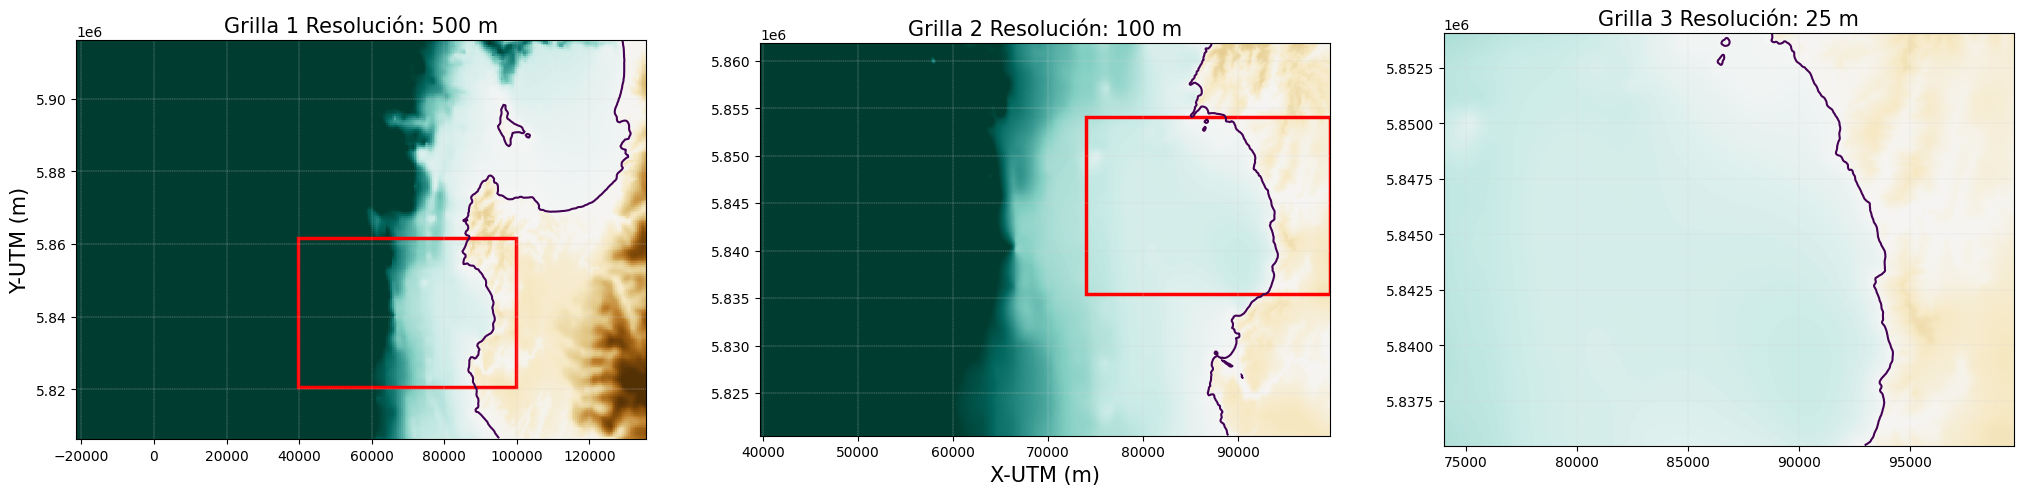

In [6]:
#Creamos el grafico
alto  = 12.5
ancho = 25

fig, ax = plt.subplots(1,3,figsize=(ancho,alto))
ax = ax.ravel()

Z = ['500','100','25']
cmap=plt.cm.BrBG_r

for i in range(len(ax)):
  ax[i].pcolormesh(eval('x'+Z[i]),eval('y'+Z[i]),eval('z'+Z[i]),cmap=cmap,vmin=-1000,vmax=1000)
  ax[i].contour(eval('x'+Z[i]),eval('y'+Z[i]),eval('z'+Z[i]),levels=[0])
  ax[i].set_title('Grilla '+str(i+1)+' Resolución: '+Z[i]+' m',fontsize=15)
  ax[i].set_aspect('equal')
  #ax[i].set_xlim(min(tiempo),max(tiempo))
  ax[i].grid(color='lightgray', linestyle='--', linewidth=0.25)
  if i == 0:
    ax[i].set_ylabel('Y-UTM (m)',fontsize=15)
  elif i == 1:
    ax[i].set_xlabel('X-UTM (m)',fontsize=15)
  if i in [0,1]:
    ax[i].add_patch(Rectangle((np.min(eval('x'+Z[i+1])), np.min(eval('y'+Z[i+1]))), np.max(eval('x'+Z[i+1]))-np.min(eval('x'+Z[i+1])), np.max(eval('y'+Z[i+1]))-np.min(eval('y'+Z[i+1])), fill=None,edgecolor='r',linewidth=2.5))


plt.show()

/usr/local/lib/python3.12/dist-packages/matplotlib/colors.py:2293: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin


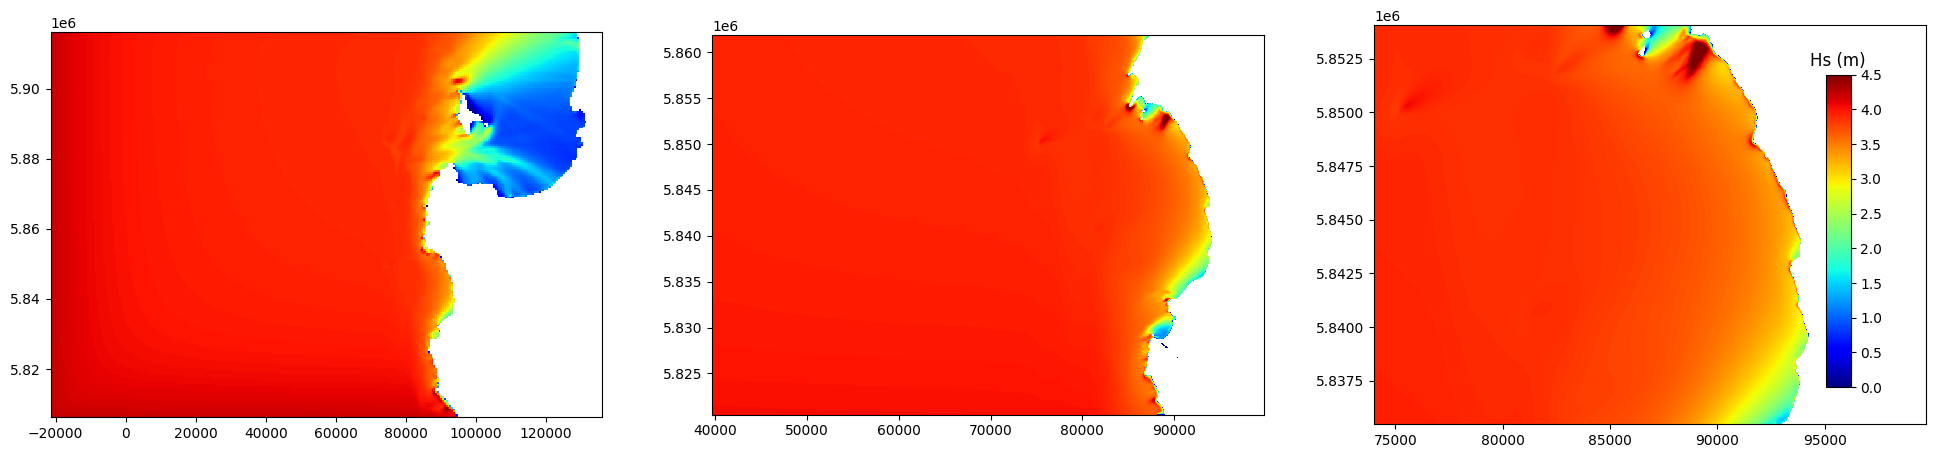

In [7]:
import scipy.io as sio

# Resultados SWAN
#Grillas
Zgrid = ['500','100','25']

#Creamos el grafico
alto  = 12.5
ancho = 25

fig, ax = plt.subplots(1,3,figsize=(ancho,alto))
ax = ax.ravel()

for i in range(len(Zgrid)):
  X = sio.loadmat('X'+Zgrid[i]+'.mat')['Xp']
  Y = sio.loadmat('Y'+Zgrid[i]+'.mat')['Yp']
  Z = sio.loadmat('Z'+Zgrid[i]+'.mat')['Depth']
  Hs = sio.loadmat('H'+Zgrid[i]+'.mat')['Hsig']
  im = ax[i].pcolormesh(X,Y,Hs,cmap='jet',vmin=0,vmax=4.5)
  ax[i].set_aspect('equal')


fig.subplots_adjust(right=0.875)
cbar_ax = fig.add_axes([0.835, 0.365, 0.01, 0.25])
cbar_ax.set_title('Hs (m)')
fig.colorbar(im, cax=cbar_ax)
plt.show()

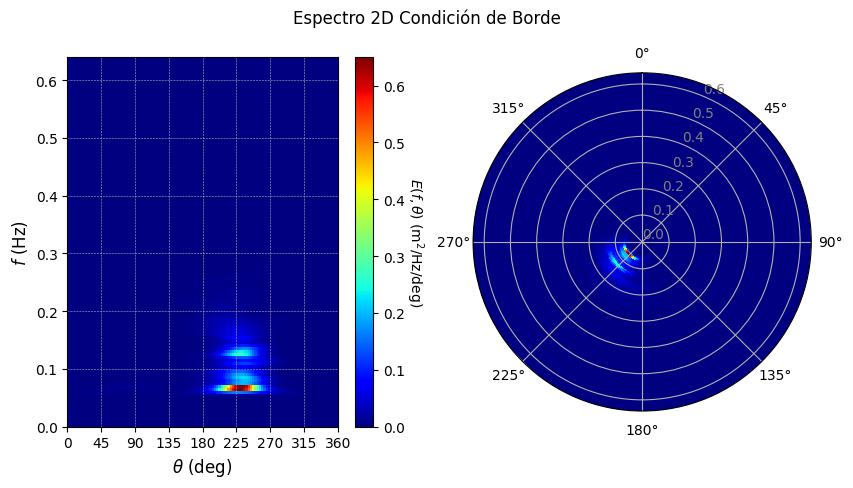

In [181]:
#Espectro
#Afreq = np.genfromtxt('specin.spc',skip_header=8,skip_footer=137,encoding='latin-1')
Afreq = np.loadtxt('specin.spc',skiprows=8,max_rows=137-8,encoding='latin-1')
NDir  = np.genfromtxt('specin.spc',skip_header=139,skip_footer=136,encoding='latin-1')
E     = np.genfromtxt('specin.spc',skip_header=266,encoding='latin-1')

X, Y = np.meshgrid(NDir,Afreq)

fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle('Espectro 2D Condición de Borde')

ax = fig.add_subplot(1, 2, 1)


plot1 = ax.pcolormesh(NDir,Afreq,E,cmap='jet',vmin=0, vmax=0.65)
cbar = plt.colorbar(plot1,ax=ax)
cbar.set_label('$E(f,\\theta)$ (m$^2$/Hz/deg)', rotation=270, labelpad=15)
ax.set_xlim([NDir[0],NDir[-1]])
ax.set_xticks(np.arange(0,360+45,45))
ax.set_ylim([Afreq[0],Afreq[-1]])
ax.set_xlabel('$\\theta$ (deg)',fontsize=12, color='black')
ax.set_ylabel('$f$ (Hz)',fontsize=12, color='black')
ax.grid(linewidth=0.4,linestyle='--')


ax = fig.add_subplot(1, 2, 2, projection='polar')
ax.set_theta_direction(-1)
#ax.set_theta_offset(np.pi/2.0)
ax.set_theta_zero_location('N')
R, THETA = np.meshgrid(Afreq,np.radians(NDir))
ax.pcolormesh(THETA,R,E.T,cmap='jet',vmin=0, vmax=0.65)
ax.tick_params(axis='y', colors='gray')

plt.show()

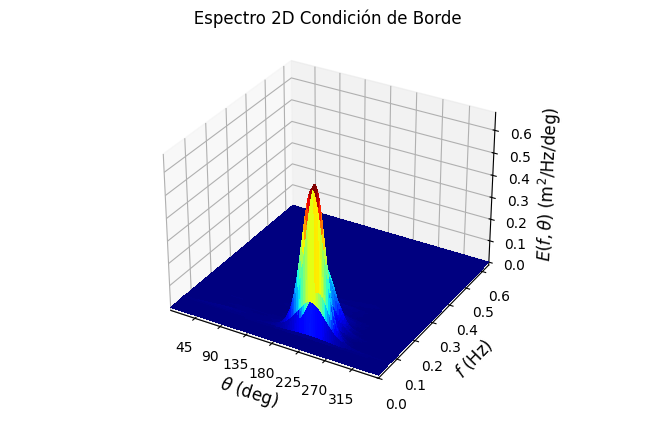

In [182]:
fig = plt.figure()
#fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X,Y,E,cmap='jet',rstride=1,cstride=1,vmin=0, vmax=0.65,linewidth=0,antialiased=False)
#ax.plot_wireframe(X,Y,E,rstride=2,cstride=2,colors='grey')
ax.set_xlabel('$\\theta$ (deg)',fontsize=12)
ax.set_xticks(np.arange(0,360+45,45))
ax.set_title(" " * 35 + "Espectro 2D Condición de Borde" + " " * 35)
ax.set_ylabel('$f$ (Hz)',fontsize=12)
ax.set_zlabel('$E(f,\\theta)$ (m$^2$/Hz/deg)',fontsize=12)
ax.set_xlim([NDir[0],NDir[-1]])
ax.set_ylim([Afreq[0],Afreq[-1]])
#ax.set_zlim(-1, 1)
plt.show()